<a href="https://colab.research.google.com/github/majeedhussain49/testing_colab/blob/master/notebooks/Classifier_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uncomment the below cell if you are running this notebook in colab

In [1]:
#!pip install keras
#!pip install matplotlib
#!pip install opencv-python
#!pip install Pillow
#!pip install numpy
#!pip install scikit-learn
#!pip install git+https://github.com/raghakot/keras-vis.git 
#!pip install git+https://github.com/totti0223/lucid4keras.git 
#!pip install coremltools
#!pip install imutils
#!pip install image-classifiers

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
import tensorflow.keras.backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import pickle
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!unzip /content/gdrive/MyDrive/plant.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

In [5]:
!pip install split-folders tqdm


In [7]:
import splitfolders


# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/plantvillage dataset/color/", output="/content/sample_data/output/", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

Copying files: 54305 files [00:27, 1960.82 files/s]


In [13]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow.keras as keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam, RMSprop,SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import pickle
%matplotlib inline

AttributeError: ignored

In [8]:
#Assigning paths
train_path = '/content/sample_data/output/train/'
valid_path = '/content/sample_data/output/val'
test_path = '/content/sample_data/output/test'

Uncomment the below cell if you are running this notebook in colab, you have to upload the Dataset folder in your google drive and later run the following cells to access all the data in your colab.

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [16]:
import os
path =  sorted(os.listdir('/content/sample_data/output/train'))
print(path)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [17]:
classnames = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
#Assigning paths
#train_path = '/content/Dataset/train/'
#valid_path = '/content/Dataset/validation/'
#test_path = '/content//Dataset/test/'

In [18]:
#Generating batches using ImageDataGenerator
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256),classes= classnames, batch_size = 32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(256,256),classes = classnames,batch_size =32)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(256,256),classes= classnames,batch_size=16)

Found 43429 images belonging to 38 classes.
Found 5417 images belonging to 38 classes.
Found 5459 images belonging to 38 classes.


In [19]:
# plotting images with labels
def plots(ims, figsize=(12,6), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation = None if interp else 'none')
            

In [20]:
imgs,labels = next(train_batches)

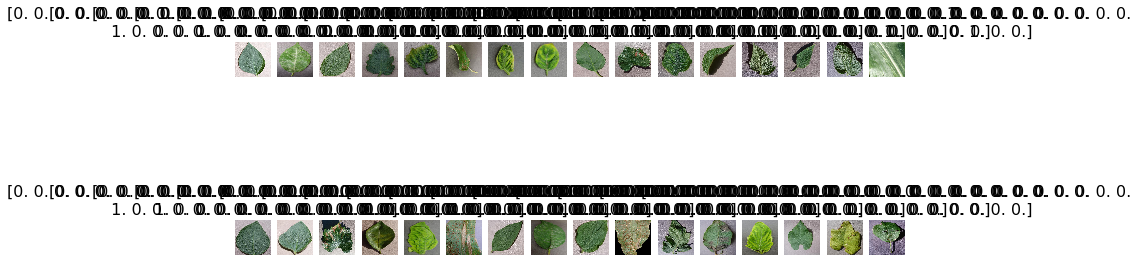

In [22]:
import numpy as np
plots(imgs,titles=labels)

# Build and train CNN

# Let's Start with simple model 

In [ ]:
model = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),Flatten(),Dense(7,activation='softmax')])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
epochs = 10
Init_lr = 1e-3
opt = keras.optimizers.Adam(lr=Init_lr, decay=Init_lr / epochs)
# compile
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2064512)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 14451591  
Total params: 14,452,487
Trainable params: 14,452,487
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(train_batches,steps_per_epoch=350,validation_data=valid_batches,validation_steps=280,epochs=3,verbose=1)

Epoch 1/3
350/350 [==============================] - 360s 1s/step - loss: 3.9254 - acc: 0.7551 - val_loss: 3.9323 - val_acc: 0.7547
Epoch 2/3
350/350 [==============================] - 371s 1s/step - loss: 3.9340 - acc: 0.7546 - val_loss: 3.9143 - val_acc: 0.7558
Epoch 3/3
350/350 [==============================] - 366s 1s/step - loss: 3.9384 - acc: 0.7543 - val_loss: 3.9356 - val_acc: 0.7545


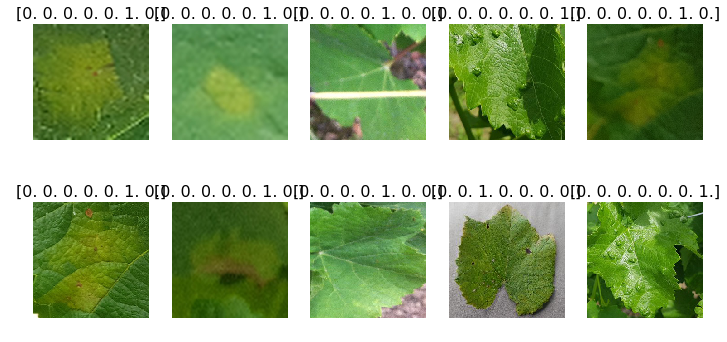

In [ ]:
#we have not got a good results here we will do some fine-tuning of some parameters to improve the results
#Before that lets do the prediction on our test data and see the confusion matrix

test_imgs,test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [ ]:
#test_labels 
test_labels


array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Predictions
Prediction = model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
Prediction

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
cm = confusion_matrix(test_labels.argmax(axis=1),Prediction.argmax(axis=1))

In [ ]:
#Simple program to plot confusion matrix (you can find this in scikit learn documentation)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[0 0 0 1 0 0]
 [0 0 0 2 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 3 0 0]
 [0 0 0 2 0 0]]


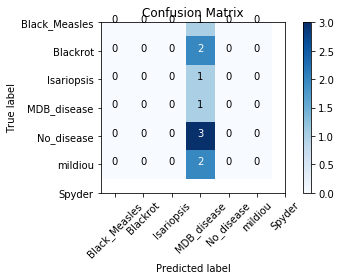

In [ ]:
cm_plot_labels = ['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","mildiou","Spyder"]
plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix')

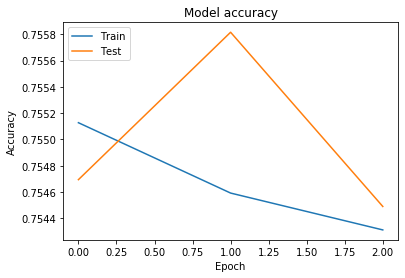

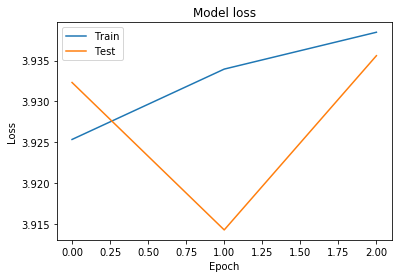

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As we see the performance is poor we will use Pretrained networks to see good results

# Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.(source:pyimagesearchblog)

Here we use a pretrained network namely VGG16, It is a deep convolutional network for object recognition developed and trained by Oxford's renowned Visual Geometry Group (VGG), which achieved very good performance on the ImageNet dataset.

# Building Fine-Tuned VGG16

In [23]:

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import AveragePooling2D
from keras.applications import VGG16
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os


baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(256, 256, 3)))

ImportError: ignored

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(256, 256, 3)))

In [38]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [39]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(38, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [40]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
# compiling the model
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
# Save the model according to the conditions  
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [ ]:
#fitting the model

history = model.fit_generator(
      train_batches,
      steps_per_epoch=train_batches.samples/train_batches.batch_size ,epochs=10,
      validation_data=valid_batches,
      validation_steps=valid_batches.samples/valid_batches.batch_size,
      verbose=1,callbacks=([early,checkpoint]))

As we can see the performance is improved to around 92% of validation accuracy.But the acuuracy is flunctuating the model is overfitting so we will hypertune and try to improve the performance of model.

In [ ]:
from keras.models import load_model
model = load_model('../saved_models/VGG16_1.h5')

In [ ]:
Prediction = model.predict_generator(test_batches,steps=7,verbose=0)

In [ ]:
cm = confusion_matrix(test_batches.classes,Prediction.argmax(axis=1))

In [ ]:
cm_plot_labels = ['Black_Measles','Blackrot','Isariopsis',"MDB_disease","No_disease","mildiou","Spyder"]
plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix')

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# saving the model in pickle

filename = '../saved_models/VGG16.sav'
pickle.dump(model, open(filename, 'wb'))

#  Data Augmentation

Let's now do data augmentation as we know deep learning networks are data hungry, we will try to generate more samples using our current data by data augmentation techniques.

# Example

Let's now augment one sample and see the output. We will apply some random transformations for ur image like rotation,shear,zoom etc as shown in below

In [25]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

# Load the most beautiful picture in the world
img = load_img('../Dataset/test/Blackrot/Blackrot 1651.jpg')
print('Original')
plt.imshow(img)
plt.show()

# Create object to transform data
data_generator = ImageDataGenerator(rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.3,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

# Preprocess data
X = img_to_array(img)  
X = X.reshape((1,) + X.shape)  

# Apply transformation
i = 0
print('Transfomed')
for batch in data_generator.flow(X):
    i += 1
    plt.imshow(array_to_img(batch[0]))
    plt.show()
    if i % 3 == 0:  # Generate three transformed pictures
        break  # To avoid generator to loop indefinitely

FileNotFoundError: ignored

As we saw now it looks now we will do in for some folder an save those augmented images to use later.

In [26]:
from  scipy import ndimage
import numpy as np
import glob

datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
height_shift_range=0.1,shear_range=0.15, 
zoom_range=0.1,channel_shift_range = 10, horizontal_flip=True)


#for filename in Path('image_path').glob('**/*.jpg'):
 #   print(filename)

for i in glob.glob('C:/Users/majee/Desktop/Internship-laas/classification/spuaug/mildiou/*.png'):#give your image folder path here
    image = np.expand_dims(ndimage.imread(i), 0)
    save_here = 'C:/Users/majee/Desktop/Internship-laas/classification/spuaug/' # give the path where to save images 
    datagen.fit(image)
    
    for x, val in zip(datagen.flow(image,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='jpg'),range(10)) :
        pass# here we define a range because we want 10 augmented images otherwise it will keep looping forever I think

In [32]:

#Data augmentation 

train_datagen = ImageDataGenerator(
      rescale=1./255,
       rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(256, 256),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        valid_path,
        target_size=(256, 256),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)


Found 43429 images belonging to 38 classes.
Found 5417 images belonging to 38 classes.


In [33]:
print(train_generator.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [29]:
#CallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
#tbcallbacks = [keras.callbacks.TensorBoard(
 #   log_dir = 'my_log_dir',
  #  histogram_freq = 1,
  #  embeddings_freq = 1,
   # embeddings_data = train_generator,
#)]
#import os
#import datetime
#logdir = os.path.join("logtf2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1, batch_size=32, write_graph=True, write_grads=True, write_images=True, embeddings_freq=1, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')


In [42]:
# Save the model according to the conditions  
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_aug.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [ ]:
# Compile the model
#model.compile(loss='categorical_crossentropy',RMSprop(lr=1e-4),
#              metrics=['acc'])
model.compile(SGD(lr=1e-4, momentum=0.9),loss = 'categorical_crossentropy',metrics = ['accuracy'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1, callbacks=([early,checkpoint]))

Epoch 1/10
2714/2714 [==============================] - 907s 334ms/step - loss: 1.5305 - accuracy: 0.5818 - val_loss: 0.9162 - val_accuracy: 0.7543
Epoch 2/10
2714/2714 [==============================] - 898s 331ms/step - loss: 1.1909 - accuracy: 0.6622 - val_loss: 0.7139 - val_accuracy: 0.8028
Epoch 3/10
2714/2714 [==============================] - 896s 330ms/step - loss: 1.0050 - accuracy: 0.7106 - val_loss: 0.5713 - val_accuracy: 0.8425
Epoch 4/10
2714/2714 [==============================] - 896s 330ms/step - loss: 0.8861 - accuracy: 0.7404 - val_loss: 0.4978 - val_accuracy: 0.8558
Epoch 5/10
2714/2714 [==============================] - 900s 331ms/step - loss: 0.8011 - accuracy: 0.7633 - val_loss: 0.4439 - val_accuracy: 0.8697
Epoch 6/10
2714/2714 [==============================] - 890s 328ms/step - loss: 0.7507 - accuracy: 0.7741 - val_loss: 0.4383 - val_accuracy: 0.8695
Epoch 7/10
2225/2714 [=======================>......] - ETA: 2:25 - loss: 0.7073 - accuracy: 0.7859

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#model.save('final_model.h5')


#import cv2

#img3 = cv2.imread('mdb1578.png')

#img3 = np.reshape(img3,[1,256,256,3])

#disease = model.predict(imgg3)
#print(disease)

# Custom Model

Here we  will make a less layered custom model woth many dropout compared to before for regularization and let's see how this model performs for few epochs of training.

In [ ]:
def custom_model(chanDim):
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), padding="same",input_shape=(256,256,3),activation = 'relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, (3, 3), padding="same",activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Convolution2D(64, (3, 3), padding="same",activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(128, (3, 3), padding="same",activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Convolution2D(128, (3, 3), padding="same",activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(7,activation='softmax'))
    return model

In [ ]:
chanDim = -1
model = custom_model(chanDim)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 85, 85, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
__________

In [ ]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
# Save the model according to the conditions  
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

checkpoint = ModelCheckpoint("custom_model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

First fit to our normal data later we will fitthe model with augmentation data

In [ ]:
# Train the model
history = model.fit_generator(
      train_batches,
      steps_per_epoch=train_batches.samples/train_batches.batch_size ,epochs=10,
      validation_data=valid_batches,
      validation_steps=valid_batches.samples/valid_batches.batch_size,
      verbose=1,callbacks=([early,checkpoint]))

Epoch 1/10
350/350 [==============================] - 147s 419ms/step - loss: 0.8776 - acc: 0.7123 - val_loss: 1.3694 - val_acc: 0.5921

Epoch 00001: val_acc improved from -inf to 0.59214, saving model to custom_model.h5
Epoch 2/10
350/350 [==============================] - 142s 405ms/step - loss: 0.4941 - acc: 0.8318 - val_loss: 0.9275 - val_acc: 0.7125

Epoch 00002: val_acc improved from 0.59214 to 0.71250, saving model to custom_model.h5
Epoch 3/10
350/350 [==============================] - 148s 422ms/step - loss: 0.3836 - acc: 0.8664 - val_loss: 0.9258 - val_acc: 0.7311

Epoch 00003: val_acc improved from 0.71250 to 0.73107, saving model to custom_model.h5
Epoch 4/10
350/350 [==============================] - 152s 434ms/step - loss: 0.3265 - acc: 0.8836 - val_loss: 0.7635 - val_acc: 0.7639

Epoch 00004: val_acc improved from 0.73107 to 0.76393, saving model to custom_model.h5
Epoch 5/10
350/350 [==============================] - 149s 426ms/step - loss: 0.2899 - acc: 0.8942 - val_lo

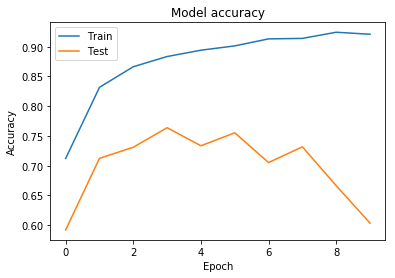

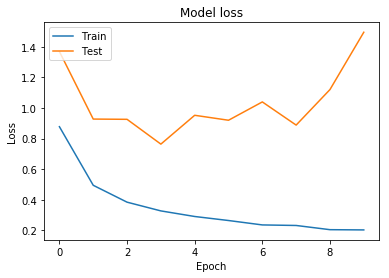

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As we see there is not much Validation accuracy increased let's train the model with augmented data 

In [ ]:
# Save the model according to the conditions  
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

checkpoint = ModelCheckpoint("custom_model_aug.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
epochs = 10
Init_lr = 1e-3
opt = keras.optimizers.Adam(lr=Init_lr, decay=Init_lr / epochs)
# compile
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])


In [ ]:

# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1, callbacks=([early,checkpoint]))

Epoch 1/10
700/700 [==============================] - 263s 375ms/step - loss: 0.8471 - acc: 0.7382 - val_loss: 0.8839 - val_acc: 0.7532

Epoch 00001: val_acc improved from -inf to 0.75321, saving model to custom_model_aug.h5
Epoch 2/10
700/700 [==============================] - 207s 296ms/step - loss: 0.5739 - acc: 0.8064 - val_loss: 1.0127 - val_acc: 0.7386

Epoch 00002: val_acc did not improve from 0.75321
Epoch 3/10
700/700 [==============================] - 203s 290ms/step - loss: 0.4113 - acc: 0.8547 - val_loss: 2.4151 - val_acc: 0.6886

Epoch 00003: val_acc did not improve from 0.75321
Epoch 4/10
700/700 [==============================] - 199s 284ms/step - loss: 0.3325 - acc: 0.8828 - val_loss: 0.5287 - val_acc: 0.8357

Epoch 00004: val_acc improved from 0.75321 to 0.83571, saving model to custom_model_aug.h5
Epoch 5/10
700/700 [==============================] - 202s 289ms/step - loss: 0.3067 - acc: 0.8919 - val_loss: 0.9904 - val_acc: 0.7579

Epoch 00005: val_acc did not improve

We see with just few layers and few epochs and with data augmentation the model reached 86 percent of validation of accuracy we can train more for few more epochs and the accuracy will increase but we will move on for now and build resnet and train for better results in next notebook.

In [ ]:
print(train_generator.class_indices)

{'No_disease': 4, 'Isariopsis': 2, 'mildiou': 6, 'Black_Measles': 0, 'Blackrot': 1, 'MDB_disease': 3, 'Spyder': 5}


In [ ]:
import cv2

img3 = cv2.imread('../Dataset/test/Black_Measles/Black_Measles 1603.JPG')

img3 = np.reshape(img3,[1,256,256,3])

disease = model.predict(img3)
print(disease.argmax())

0


# Visualization

Visualization is the key step to do to know what actually model is seeing. Earlier neural networks are considered as Black box but now due to huge development in software we have many libraries with which we can visualize evry layer and also every neuron.

In [ ]:
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(25):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

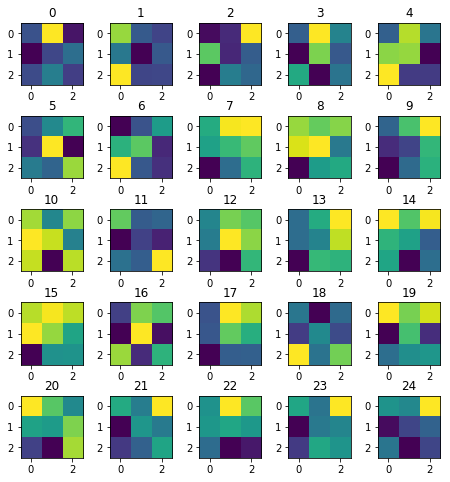

In [ ]:
layer_name = 'conv2d_5'

plot_conv_weights(model,layer_name)

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

Let's use keras visualization toolkit to look how actually neural network is looking.

In [ ]:
from vis.utils import utils

layer_idx = utils.find_layer_idx(model, 'dense_6')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

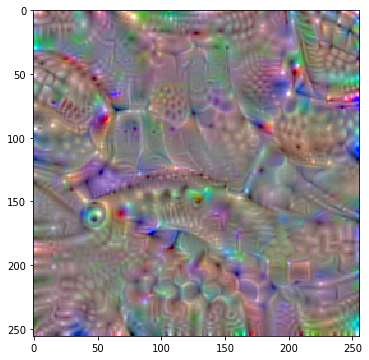

In [ ]:
from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 5 is index of Spyder
img = visualize_activation(model, layer_idx, filter_indices=5)
plt.imshow(img)

In [ ]:
# 5 is index of Spyder
#img = visualize_activation(model, layer_idx, filter_indices=5, max_iter=300, verbose=True)
#plt.imshow(img)

In [ ]:
#from vis.input_modifiers import Jitter

# 20 is the imagenet category for 'ouzel'
# Jitter 16 pixels along all dimensions to during the optimization process.
#img = visualize_activation(model, layer_idx, filter_indices=0, max_iter=500, input_modifiers=[Jitter(16)])
#plt.imshow(img)

In [ ]:
#import numpy as np
#categories = np.random.permutation(7)[:15]

#vis_images = []
#image_modifiers = [Jitter(16)]
#for idx in categories:    
 #   img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=500, input_modifiers=image_modifiers)
    
#    # Reverse lookup index to imagenet label and overlay it on the image.
#    img = utils.draw_text(img, utils.get_imagenet_label(idx))
#    vis_images.append(img)

# Generate stitched images with 5 cols (so it will have 3 rows).
#plt.rcParams['figure.figsize'] = (50, 50)
#stitched = utils.stitch_images(vis_images, cols=5)
#plt.axis('off')
#plt.imshow(stitched)
#plt.show()

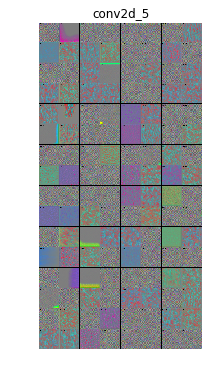

In [ ]:
from vis.visualization import get_num_filters

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_5'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

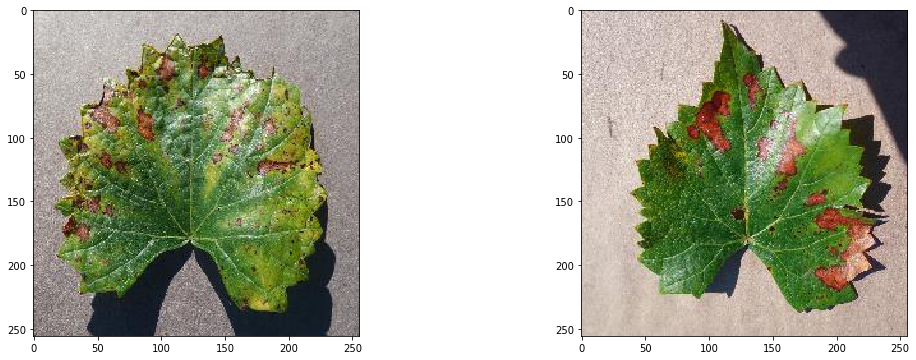

In [ ]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('../Black_Measles 1606.JPG', target_size=(256, 256))
img2 = utils.load_img('../Black_Measles 1610.JPG', target_size=(256, 256))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

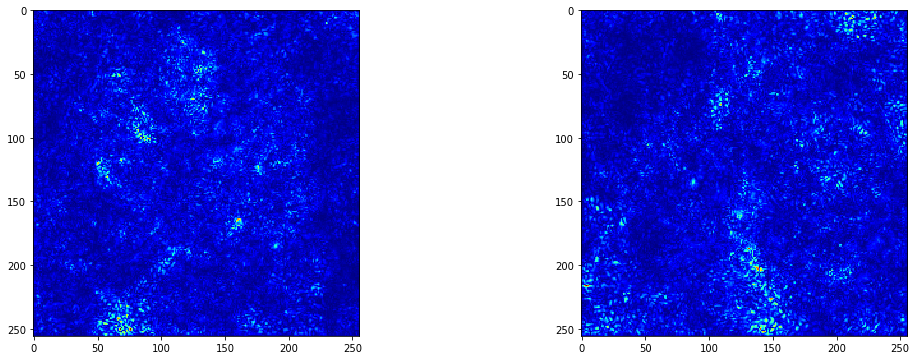

In [ ]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_6')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=0, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

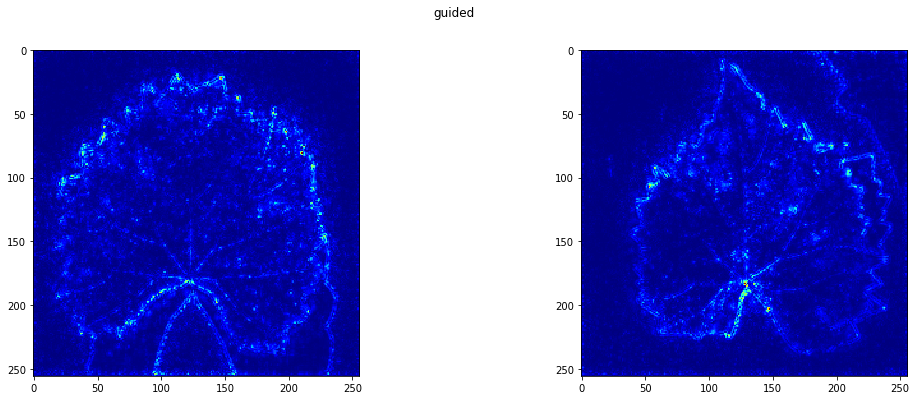

<Figure size 1296x432 with 0 Axes>

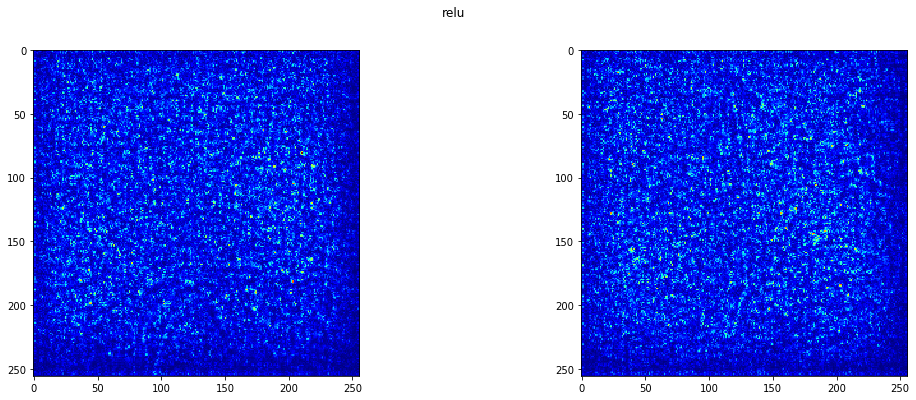

In [ ]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=0, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

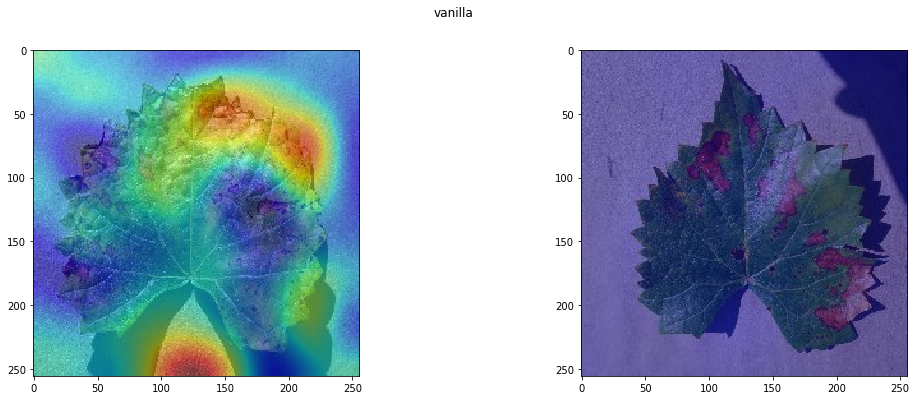

<Figure size 1296x432 with 0 Axes>

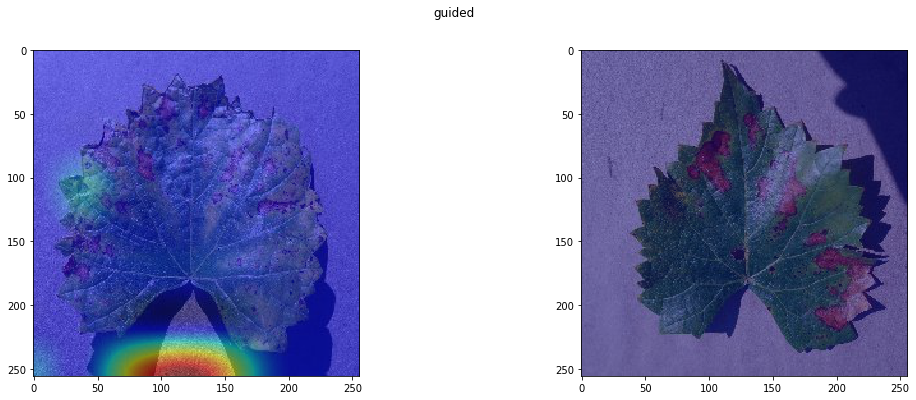

<Figure size 1296x432 with 0 Axes>

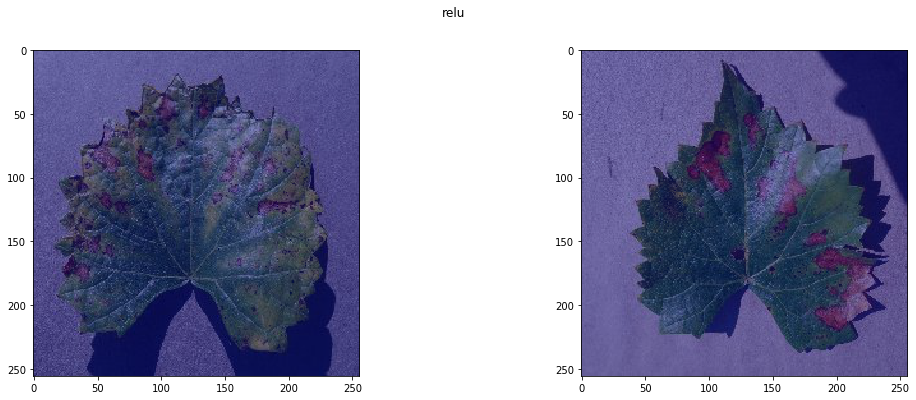

In [ ]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=0, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

Let's visualize now any neuron of any layer you like using lucid library

In [ ]:
import lucid.optvis.param as param
import lucid.optvis.transform as transform

from lucid4keras import prepare_model, keras_render_vis
from lucid4keras import objectives as keras_objectives
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K

import numpy as np

In [ ]:
# load model
model = load_model('VGG16_1.h5')
# summarize model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [ ]:
model = prepare_model(model,layer_name="block5_conv3")

linearizing layer: block5_conv3


512 33.59388



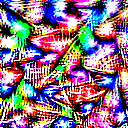

In [ ]:
images = keras_render_vis(model,127)


128 8.548205



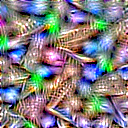

256 16.660183



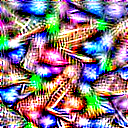

512 39.270813



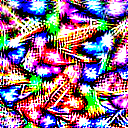

In [ ]:
images = keras_render_vis(model,"127",thresholds=[128,256,512])
